In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378.stats import *

Version:  0.0.12


# Single Population

## Normal noise + known $\sigma$

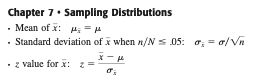
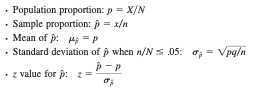

$$
\begin{eqnarray}
x_i &\sim& \mu + \epsilon_i \\
P(x_i|\mu,\sigma) &\sim& \text{Normal}(\mu,\sigma) 
\end{eqnarray}
$$
known $\sigma$

$$
\begin{eqnarray}
P(\mu|{x_i},\sigma) \sim P({x_i}|\mu,\sigma) P(\mu|\sigma)
\end{eqnarray}
$$

In [3]:
def lnlike(data,μ):
    # known σ
    x=data
    return lognormalpdf(x,μ,σ)

In [4]:
data=array([12.0,14,16])
σ=1
model=MCMCModel(data,lnlike,
                μ=Uniform(-50,50),
                )

Sampling Prior...
Done.
0.21 s
Running MCMC 1/3...
Done.
2.23 s
Running MCMC 2/3...
Done.
2.24 s
Running MCMC 3/3...
Done.
2.51 s


<Figure size 720x576 with 0 Axes>

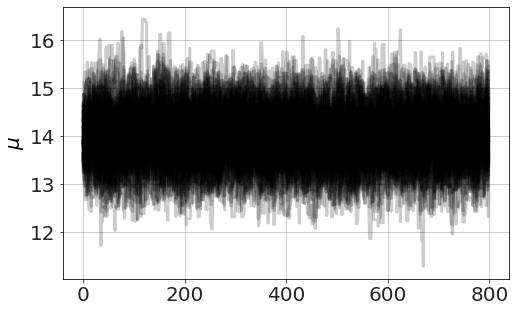

In [5]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

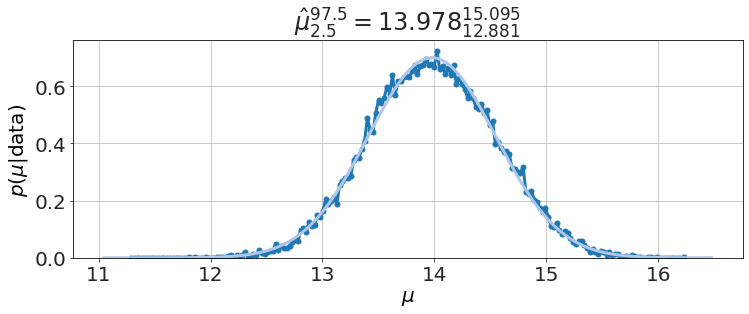

In [6]:
model.plot_distributions()

compare to textbook solution

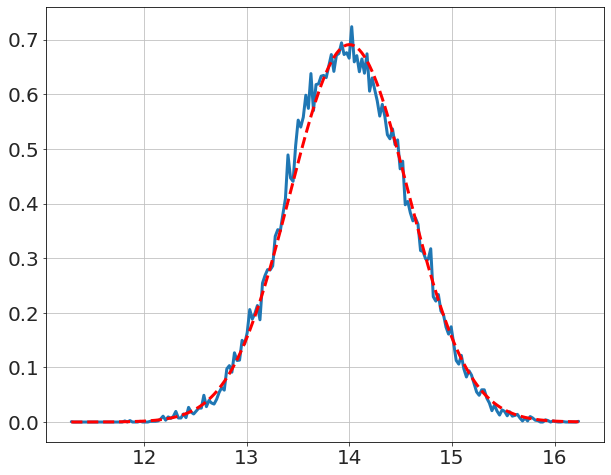

In [7]:
x,y=model.get_distribution('μ')
plot(x,y,'-')
μ̂=mean(data)
N=len(data)
σμ=σ/sqrt(N)
y_pred=[exp(lognormalpdf(_,μ̂,σμ)) for _ in x]
plot(x,y_pred,'r--')

In [8]:
model.P('μ>15')

0.037066666666666664

## Normal noise + unknown $\sigma$

In [9]:
def lnlike(data,μ,σ):
    x=data
    return lognormalpdf(x,μ,σ)

In [10]:
data=array([12.0,14,16])
model=MCMCModel(data,lnlike,
                μ=Uniform(-50,50),
                σ=Jeffreys()
                )

Sampling Prior...
Done.
0.27 s
Running MCMC 1/3...
Done.
2.63 s
Running MCMC 2/3...
Done.
2.79 s
Running MCMC 3/3...
Done.
2.47 s


<Figure size 720x576 with 0 Axes>

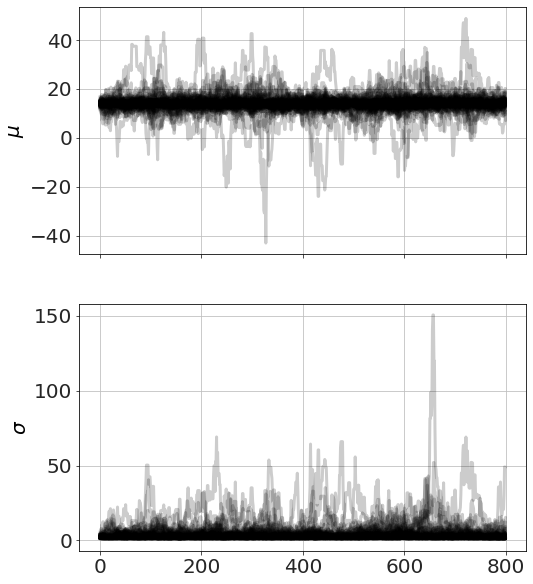

In [11]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

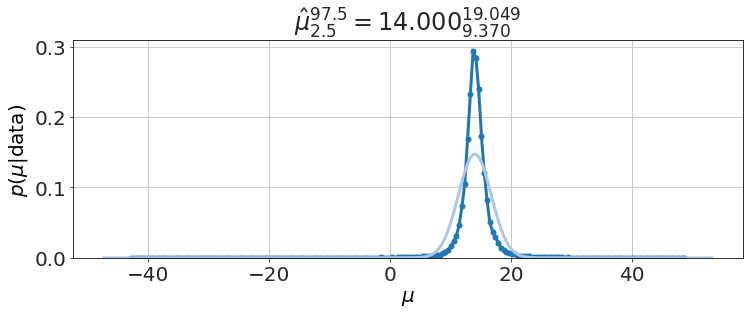

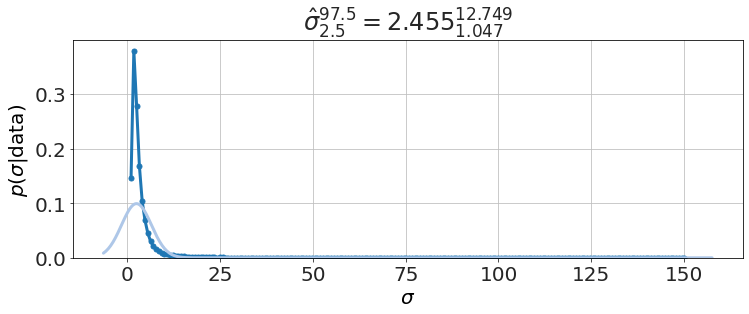

In [12]:
model.plot_distributions()

In [13]:
model.percentiles([2.5,50,97.5])

{'μ': array([ 9.36960178, 13.99974404, 19.04929154]),
 'σ': array([ 1.04737268,  2.45482376, 12.74872085])}

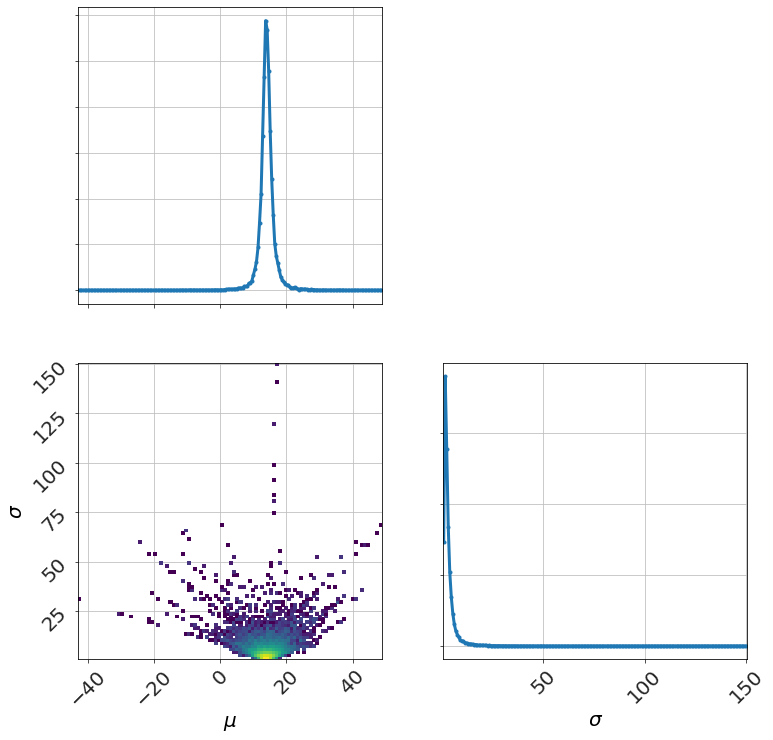

In [14]:
model.triangle_plot()

### compare to textbook

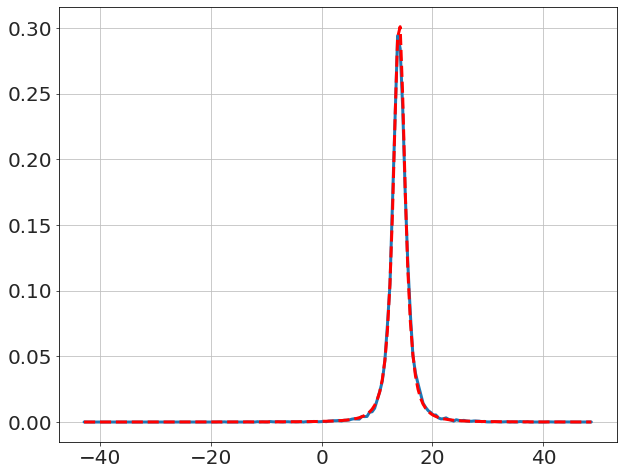

In [16]:
x,y=model.get_distribution('μ')


# In[31]:


plot(x,y,'-')
μ̂=mean(data)
N=len(data)

σμ=std(data,ddof=1)/sqrt(N)
y_pred=[exp(logtpdf(_,N-1,μ̂,σμ)) for _ in x]
plot(x,y_pred,'r--')


# In[39]:


(0.0, 20.0)

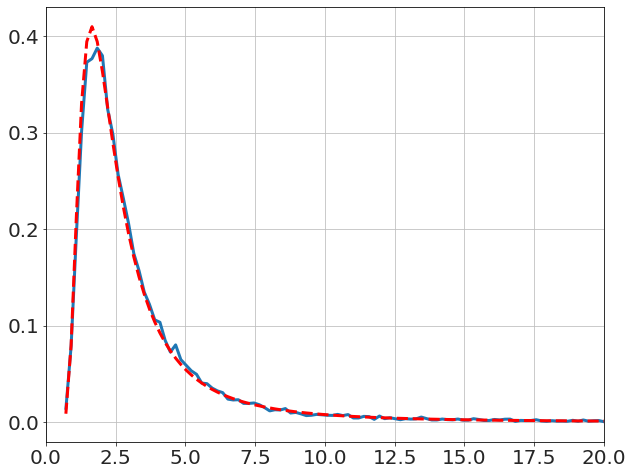

In [20]:


x,y=model.get_distribution('σ',bins=800)


# In[55]:


plot(x,y,'-')

V=((data-data.mean())**2).sum()
logp=-N*log(x)-V/2/x**2
y_pred=exp(logp)
dx=x[1]-x[0]
y_pred=y_pred/y_pred.sum()/dx

plot(x,y_pred,'r--')


# In[ ]:
xlim([0,20])


## Proportion

data: $h$, $N$

$$
P(\theta|h,N) \sim \text{Bernoulli}(\theta,h,N)
$$


In [3]:
def lnlike(data,θ):
    h,N=data
    return logbernoullipdf(θ,h,N)

In [4]:
data=3,12
model=MCMCModel(data,lnlike,
                θ=Uniform(0,1),
                )

Sampling Prior...
Done.
0.23 s
Running MCMC 1/3...
Done.
1.23 s
Running MCMC 2/3...
Done.
1.26 s
Running MCMC 3/3...
Done.
1.26 s


<Figure size 720x576 with 0 Axes>

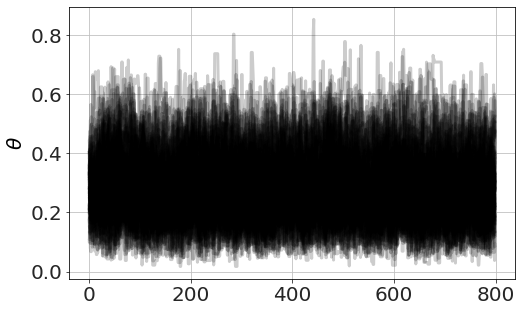

In [5]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

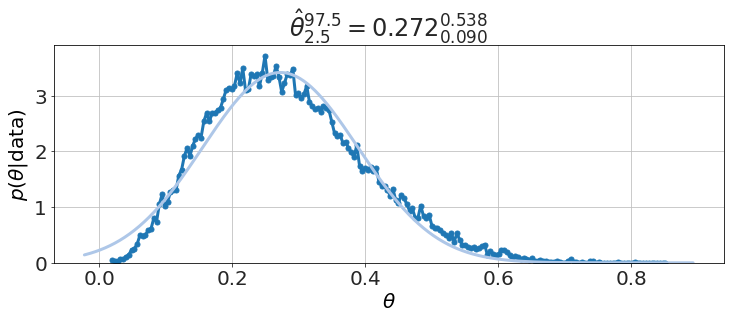

In [6]:
model.plot_distributions()

In [7]:
model.P("θ <0.5")

0.95485

# Jaynes and Confidence Intervals

https://bayes.wustl.edu/etj/articles/confidence.pdf

## Exponential


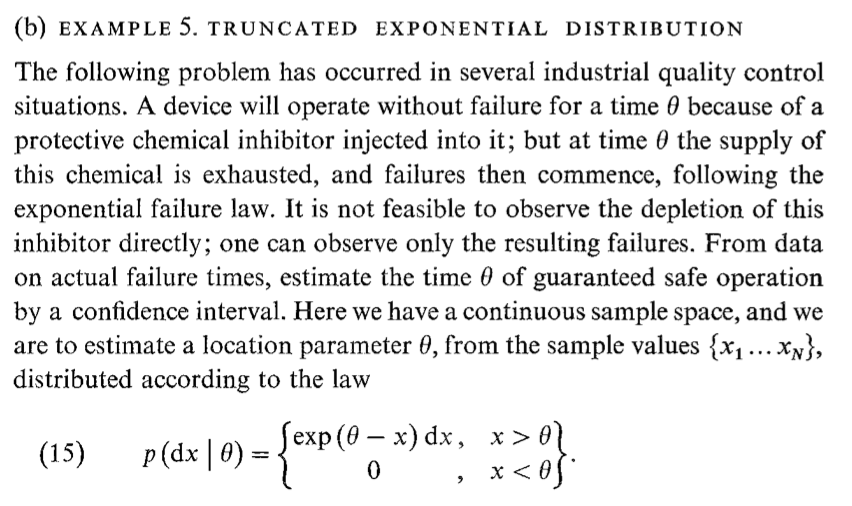

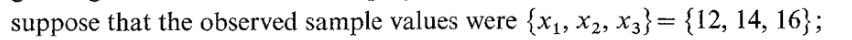

bb: What *can't* $\theta$ be, given this data?

In [16]:
def lnlike(data,θ):
    x=data
    d=θ-x
    d[d>0]=-np.inf
    return np.sum(d)

In [18]:
data=array([12.0,14,16])
model=MCMCModel(data,lnlike,
                θ=Uniform(-50,50),
                )

Sampling Prior...
Done.
0.23 s
Running MCMC 1/3...


/Users/bblais/opt/anaconda3/envs/py3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
2.64 s
Running MCMC 2/3...
Done.
2.67 s
Running MCMC 3/3...
Done.
2.72 s


<Figure size 720x576 with 0 Axes>

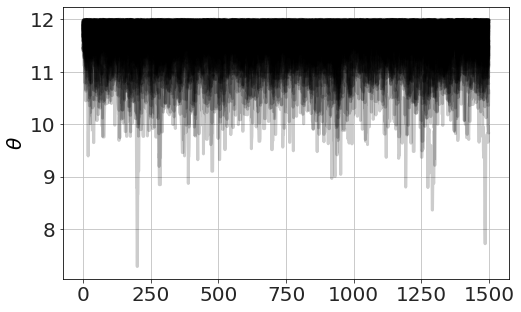

In [19]:
model.run_mcmc(1500,repeat=3)
model.plot_chains()

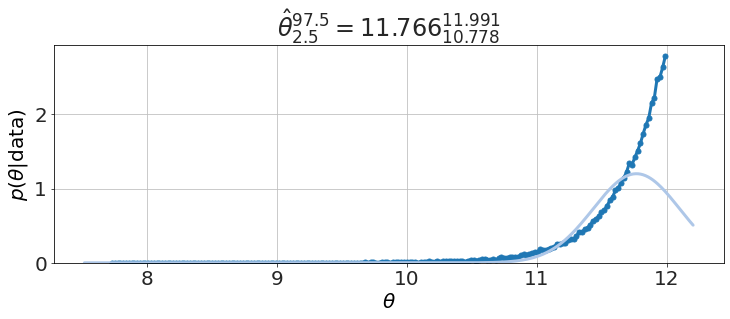

In [20]:
model.plot_distributions()

### Frequentist Solution

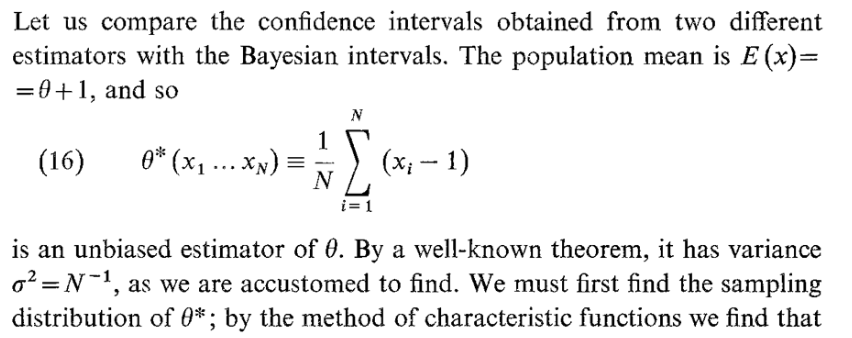

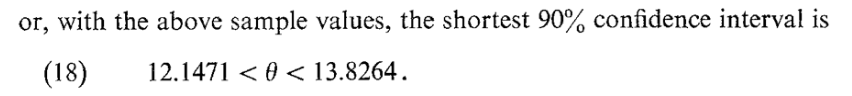

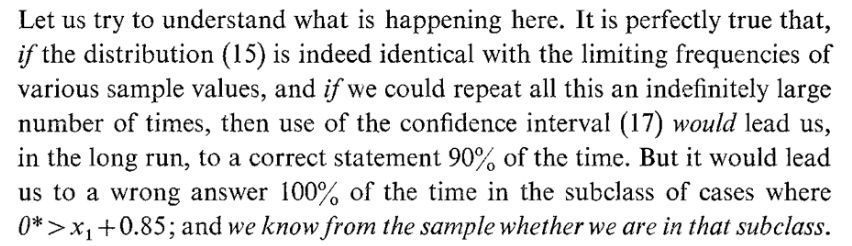

## Cauchy Distribution

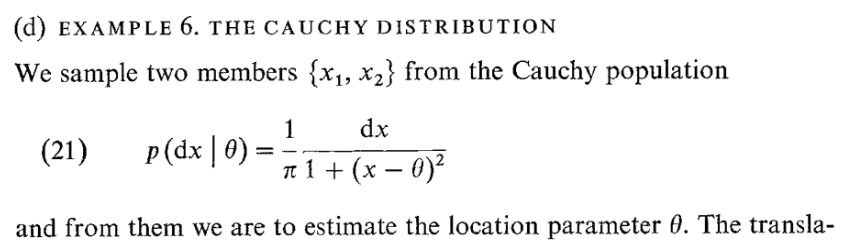

-----

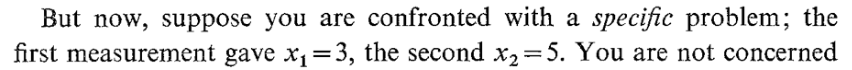

-----

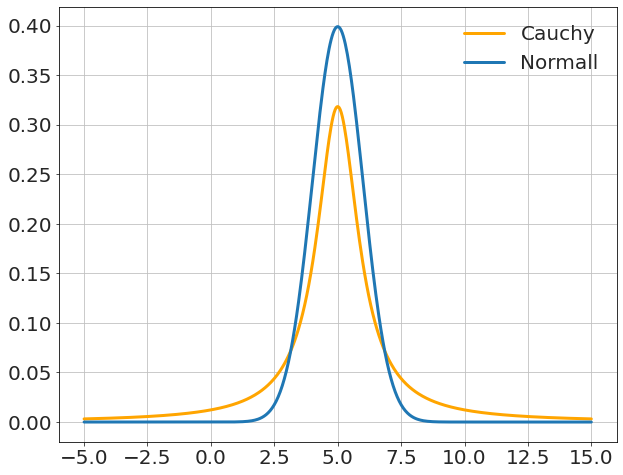

In [3]:
x=linspace(-5,15,500)
y=D.cauchy.pdf(x,loc=5,scale=1)

plot(x,y,color='orange',label='Cauchy')

y=D.norm.pdf(x,loc=5,scale=1)
plot(x,y,label='Normall')

legend()

In [4]:
def lnlike(data,μ,σ):
    x=data
    return logcauchypdf(x,μ,σ)

In [5]:
data=array([3.,5])
model=MCMCModel(data,lnlike,
                μ=Uniform(-50,50),
                σ=Jeffreys()
                )

Sampling Prior...
Done.
0.35 s
Running MCMC 1/3...
Done.
3.35 s
Running MCMC 2/3...
Done.
3.27 s
Running MCMC 3/3...
Done.
3.51 s


<Figure size 720x576 with 0 Axes>

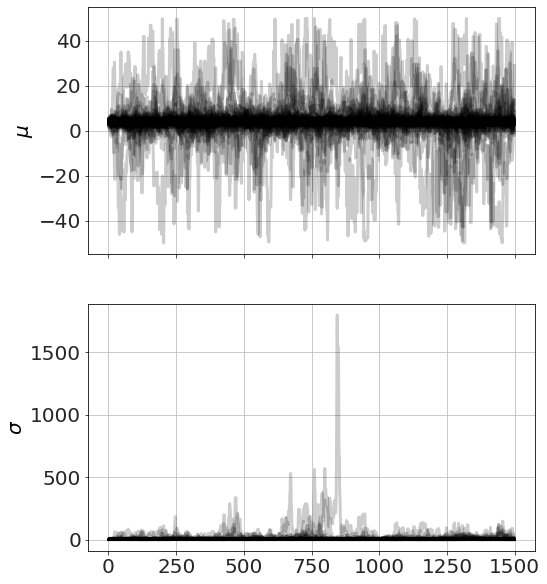

In [6]:
model.run_mcmc(1500,repeat=3)
model.plot_chains()

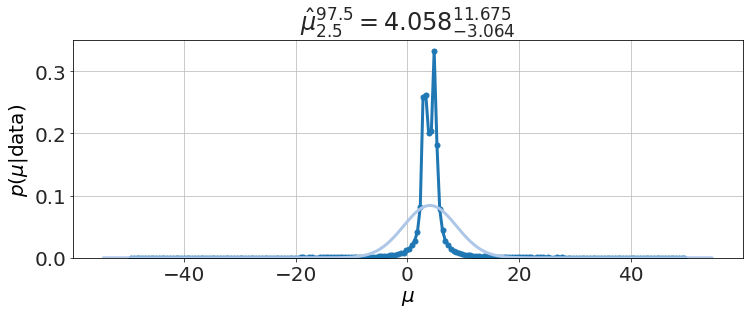

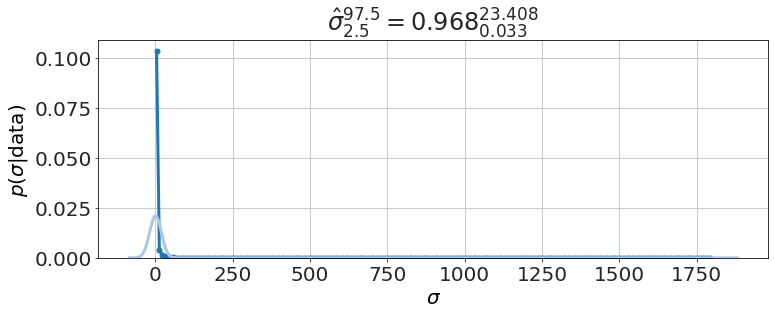

In [7]:
model.plot_distributions()

# Two Populations

In [1]:
%pylab inline
from sci378.stats import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.12


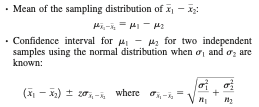

In [2]:
def lnlike(data,μ1,σ1,μ2,σ2):
    x1,x2=data
    return lognormalpdf(x1,μ1,σ1)+lognormalpdf(x2,μ2,σ2)

In [3]:
data1=array([10.,11,12])
data2=array([12.,14,16])

In [4]:
model=MCMCModel((data1,data2),lnlike,
                μ1=Uniform(-50,50),
                σ1=Jeffreys(),
                μ2=Uniform(-50,50),
                σ2=Jeffreys()
               )

Sampling Prior...
Done.
0.38 s
Running MCMC 1/3...
Done.
2.73 s
Running MCMC 2/3...
Done.
2.75 s
Running MCMC 3/3...
Done.
2.58 s


<Figure size 720x576 with 0 Axes>

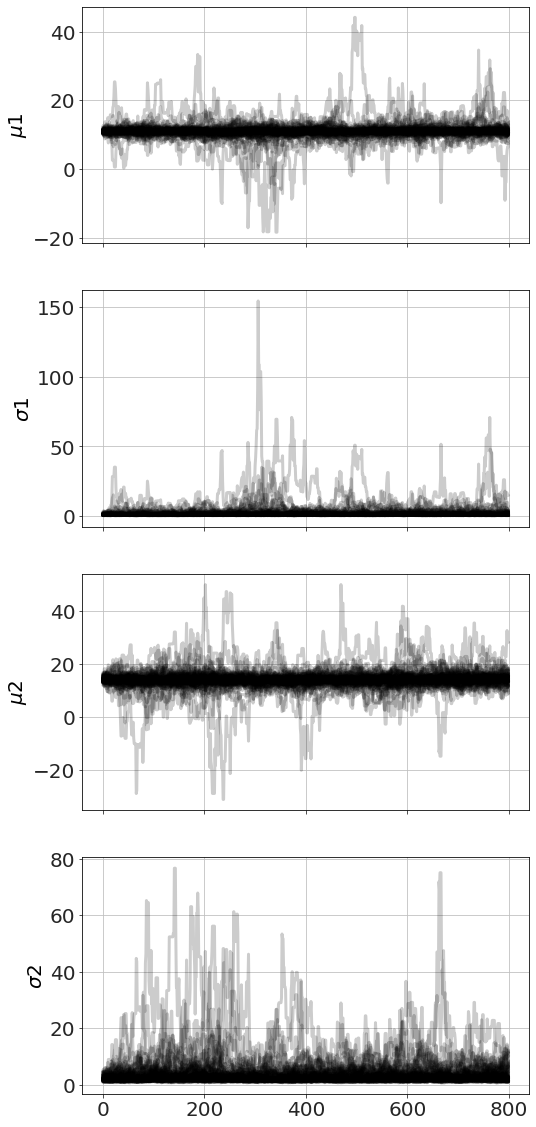

In [5]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

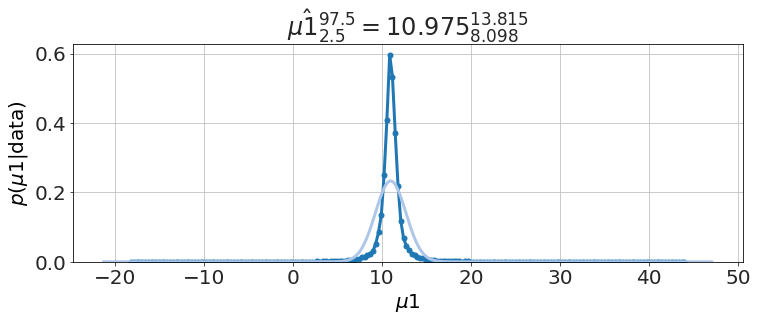

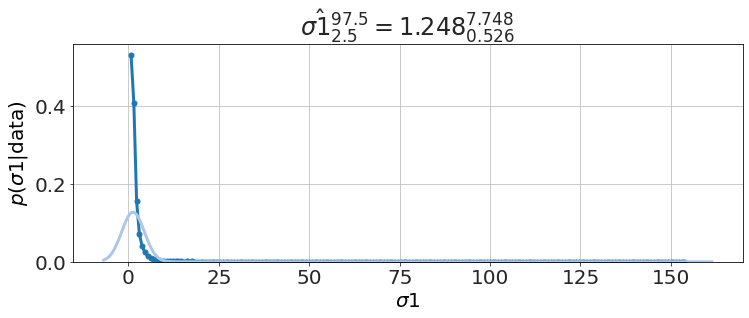

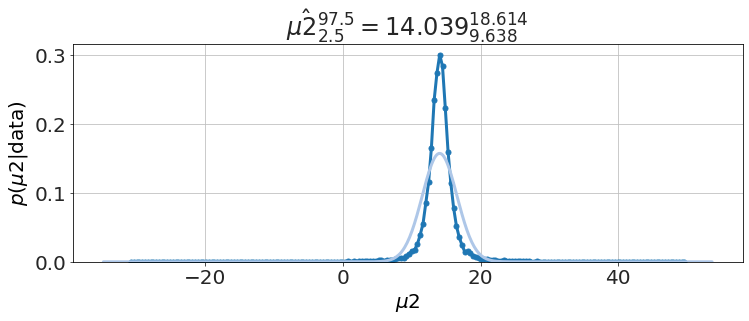

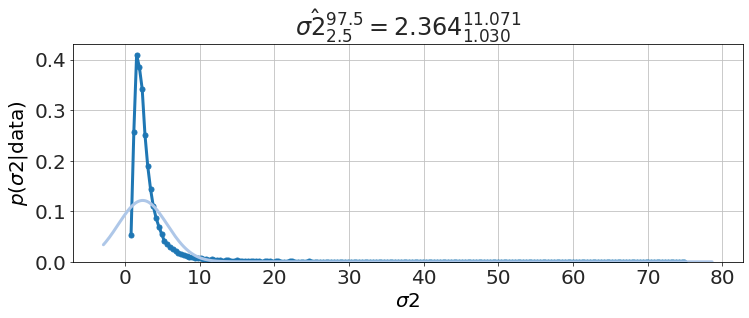

In [6]:
model.plot_distributions()

In [8]:
model.best_estimates()

{'μ1': array([10.19932068, 10.97473685, 11.76070104]),
 'σ1': array([0.75126211, 1.24793027, 2.59177348]),
 'μ2': array([12.55675586, 14.03915982, 15.50829574]),
 'σ2': array([1.47809834, 2.36367435, 4.47061108])}

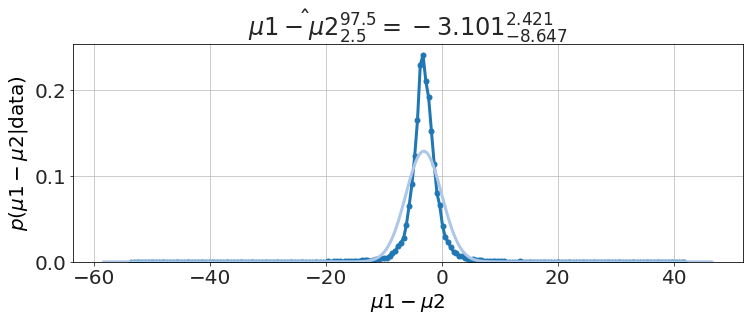

In [9]:
model.plot_distributions('μ1-μ2')

In [10]:
model.P('(μ1-μ2)>0.0')

0.07831666666666667

## Paired

In [11]:
def lnlike(data,μ,σ):
    x1,x2=data
    return lognormalpdf(x1-x2,μ,σ)

In [12]:
model=MCMCModel((data1,data2),lnlike,
                μ=Uniform(-50,50),
                σ=Jeffreys(),
               )

Sampling Prior...
Done.
0.29 s
Running MCMC 1/3...
Done.
1.97 s
Running MCMC 2/3...
Done.
2.03 s
Running MCMC 3/3...
Done.
2.03 s


<Figure size 720x576 with 0 Axes>

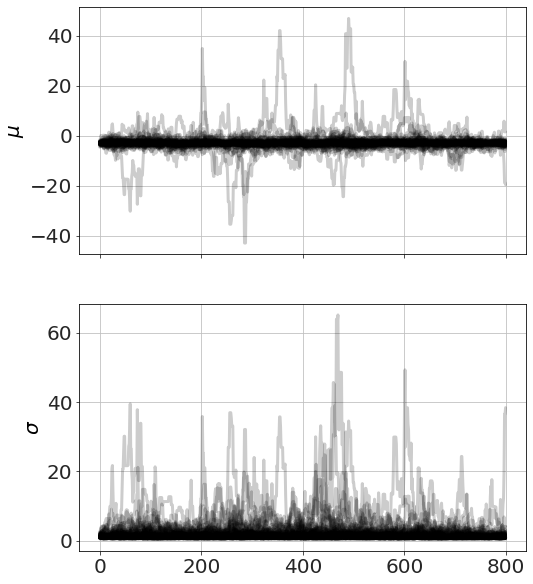

In [13]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

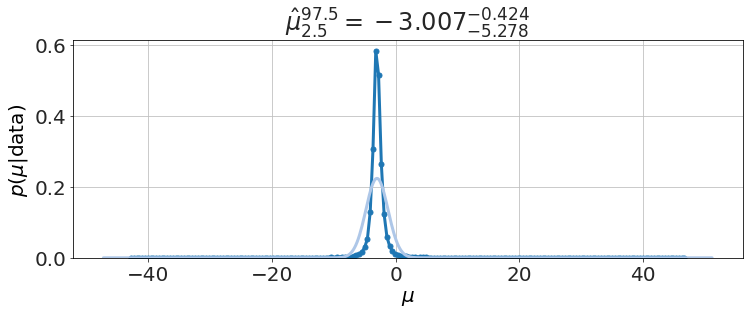

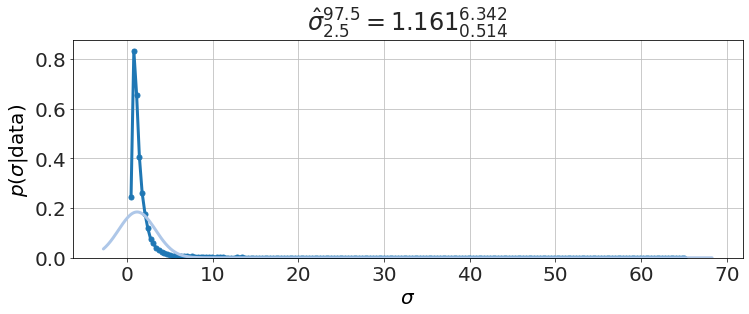

In [14]:
model.plot_distributions()

In [15]:
model.P('μ<0')

0.9802833333333333

## BEST Test

https://jkkweb.sitehost.iu.edu/BEST/

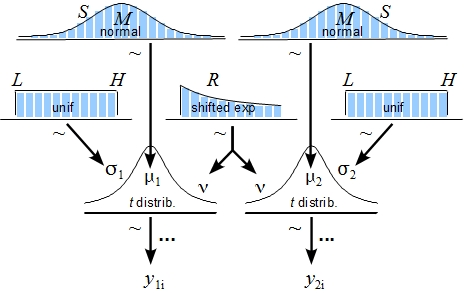

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378.stats import *

Version:  0.0.13


In [10]:
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

data1=drug
data2=placebo

pooled=np.concatenate((data1,data2))
M=pooled.mean()
S=pooled.std()


def lnprior(μ1,σ1,μ2,σ2,ν):
    value=0.0
    value+=lognormalpdf(μ1,M,1000*S)
    value+=lognormalpdf(μ2,M,1000*S)

    mn=0.001*S
    mx=1000*S
    value+=loguniformpdf(σ1,mn,mx-mn)
    value+=loguniformpdf(σ2,mn,mx-mn)

    value+=logexponpdf2(ν-1,scale=29)
    return value


def lnlike(data,μ1,σ1,μ2,σ2,ν):
    x1,x2=data
    value=0.0
    value+=logtpdf(x1,ν,μ1,σ1)
    value+=logtpdf(x2,ν,μ2,σ2)
        
    return value

model=MCMCModel((data1,data2),lnlike,
                lnprior,
                μ1=M,  # starting values for MCMC
                μ2=M,
                σ1=S,
                σ2=S,
                ν=10,
               )

In [11]:
model.params

{'μ1': 101.17977528089888,
 'μ2': 101.17977528089888,
 'σ1': 4.71803091128475,
 'σ2': 4.71803091128475,
 'ν': 10}

(100, 5)
[101.17977528 101.17977528   4.71803091   4.71803091  10.        ]
Sampling Prior...
Done.
0.61 s
Running MCMC 1/3...
Done.
5.14 s
Running MCMC 2/3...
Done.
5.40 s
Running MCMC 3/3...
Done.
5.32 s


<Figure size 720x576 with 0 Axes>

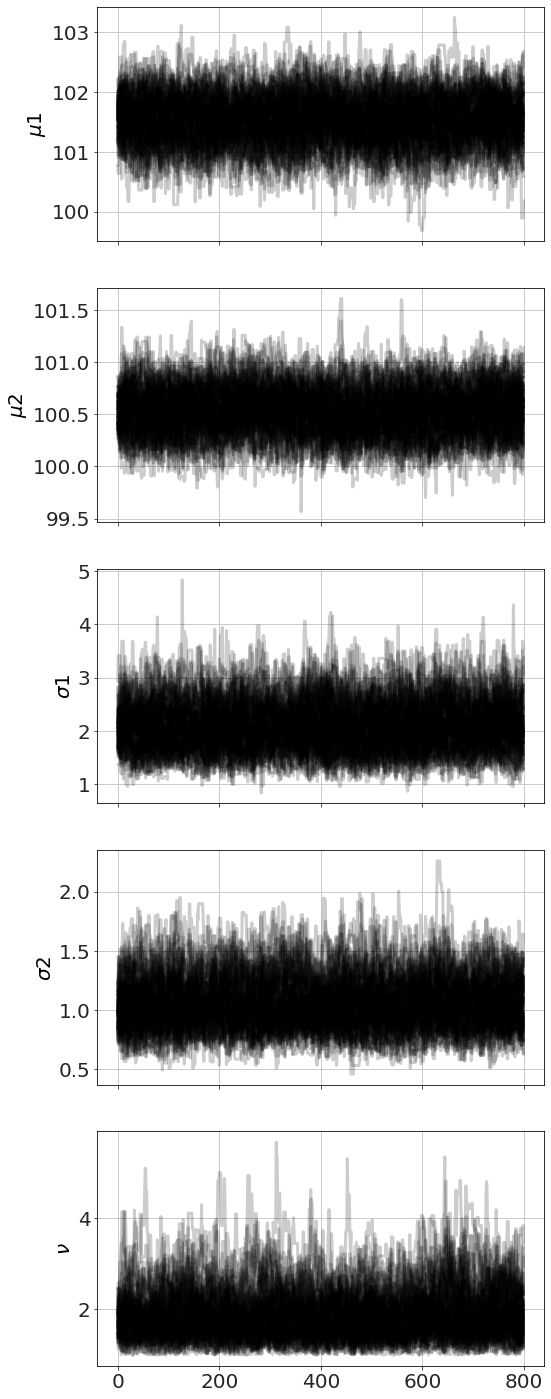

In [12]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

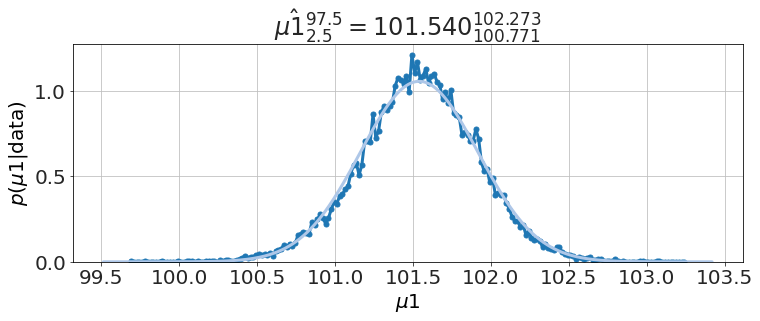

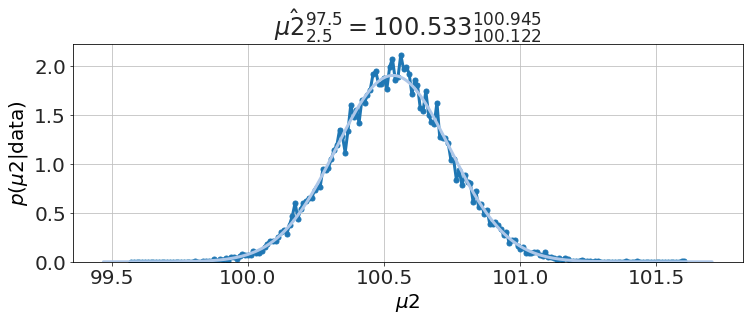

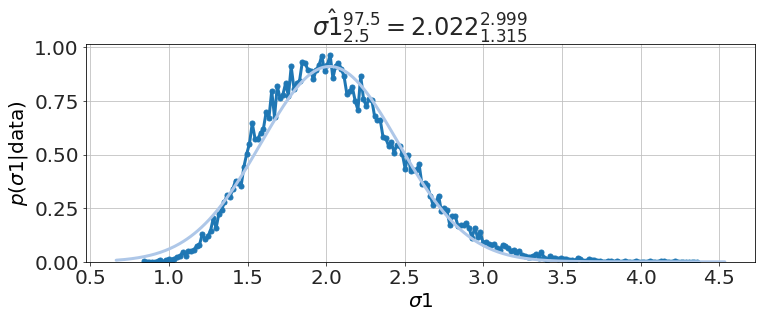

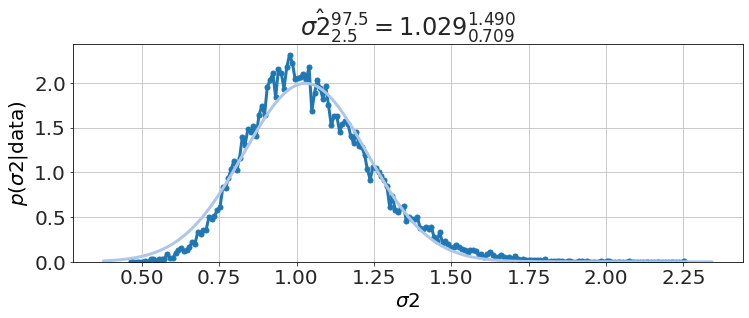

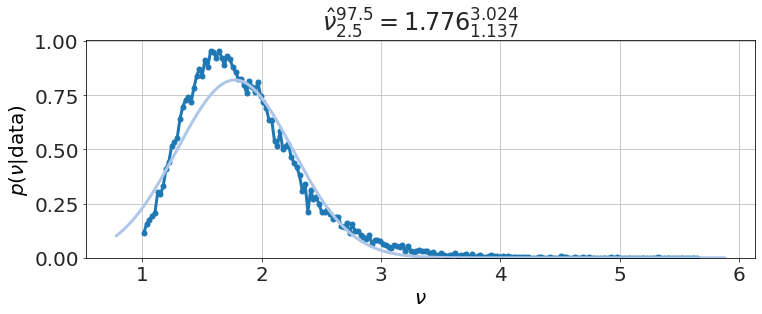

In [13]:
model.plot_distributions()

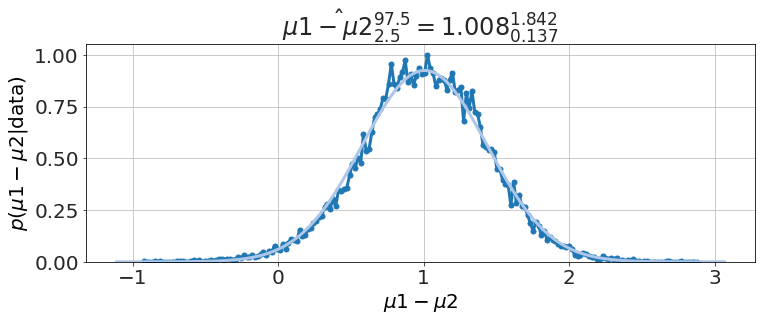

In [14]:
model.plot_distributions('μ1-μ2')

Text(0.5, 1.0, 'Difference of sigma $\\hat{σ1-σ2}^{97.5}_{2.5}=0.980^{1.952}_{0.220}$')

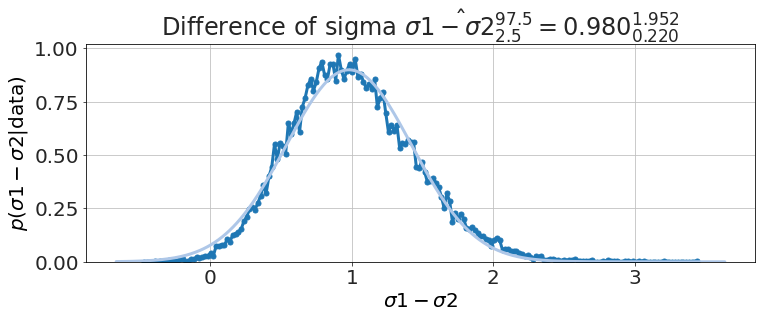

In [19]:
model.plot_distributions('σ1-σ2')
t=gca().get_title()
title('Difference of sigma '+t)

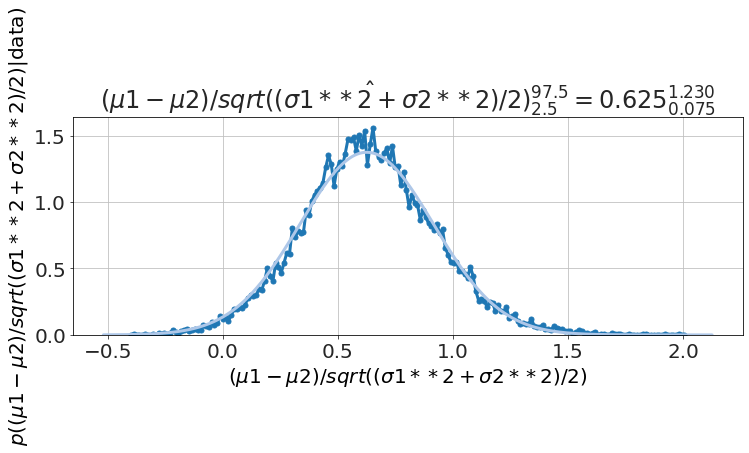

In [27]:
model.plot_distributions('(μ1-μ2)/sqrt((σ1**2+σ2**2)/2)')

In [28]:
import arviz as az

In [37]:
inference=az.from_emcee(model.sampler,model.params)

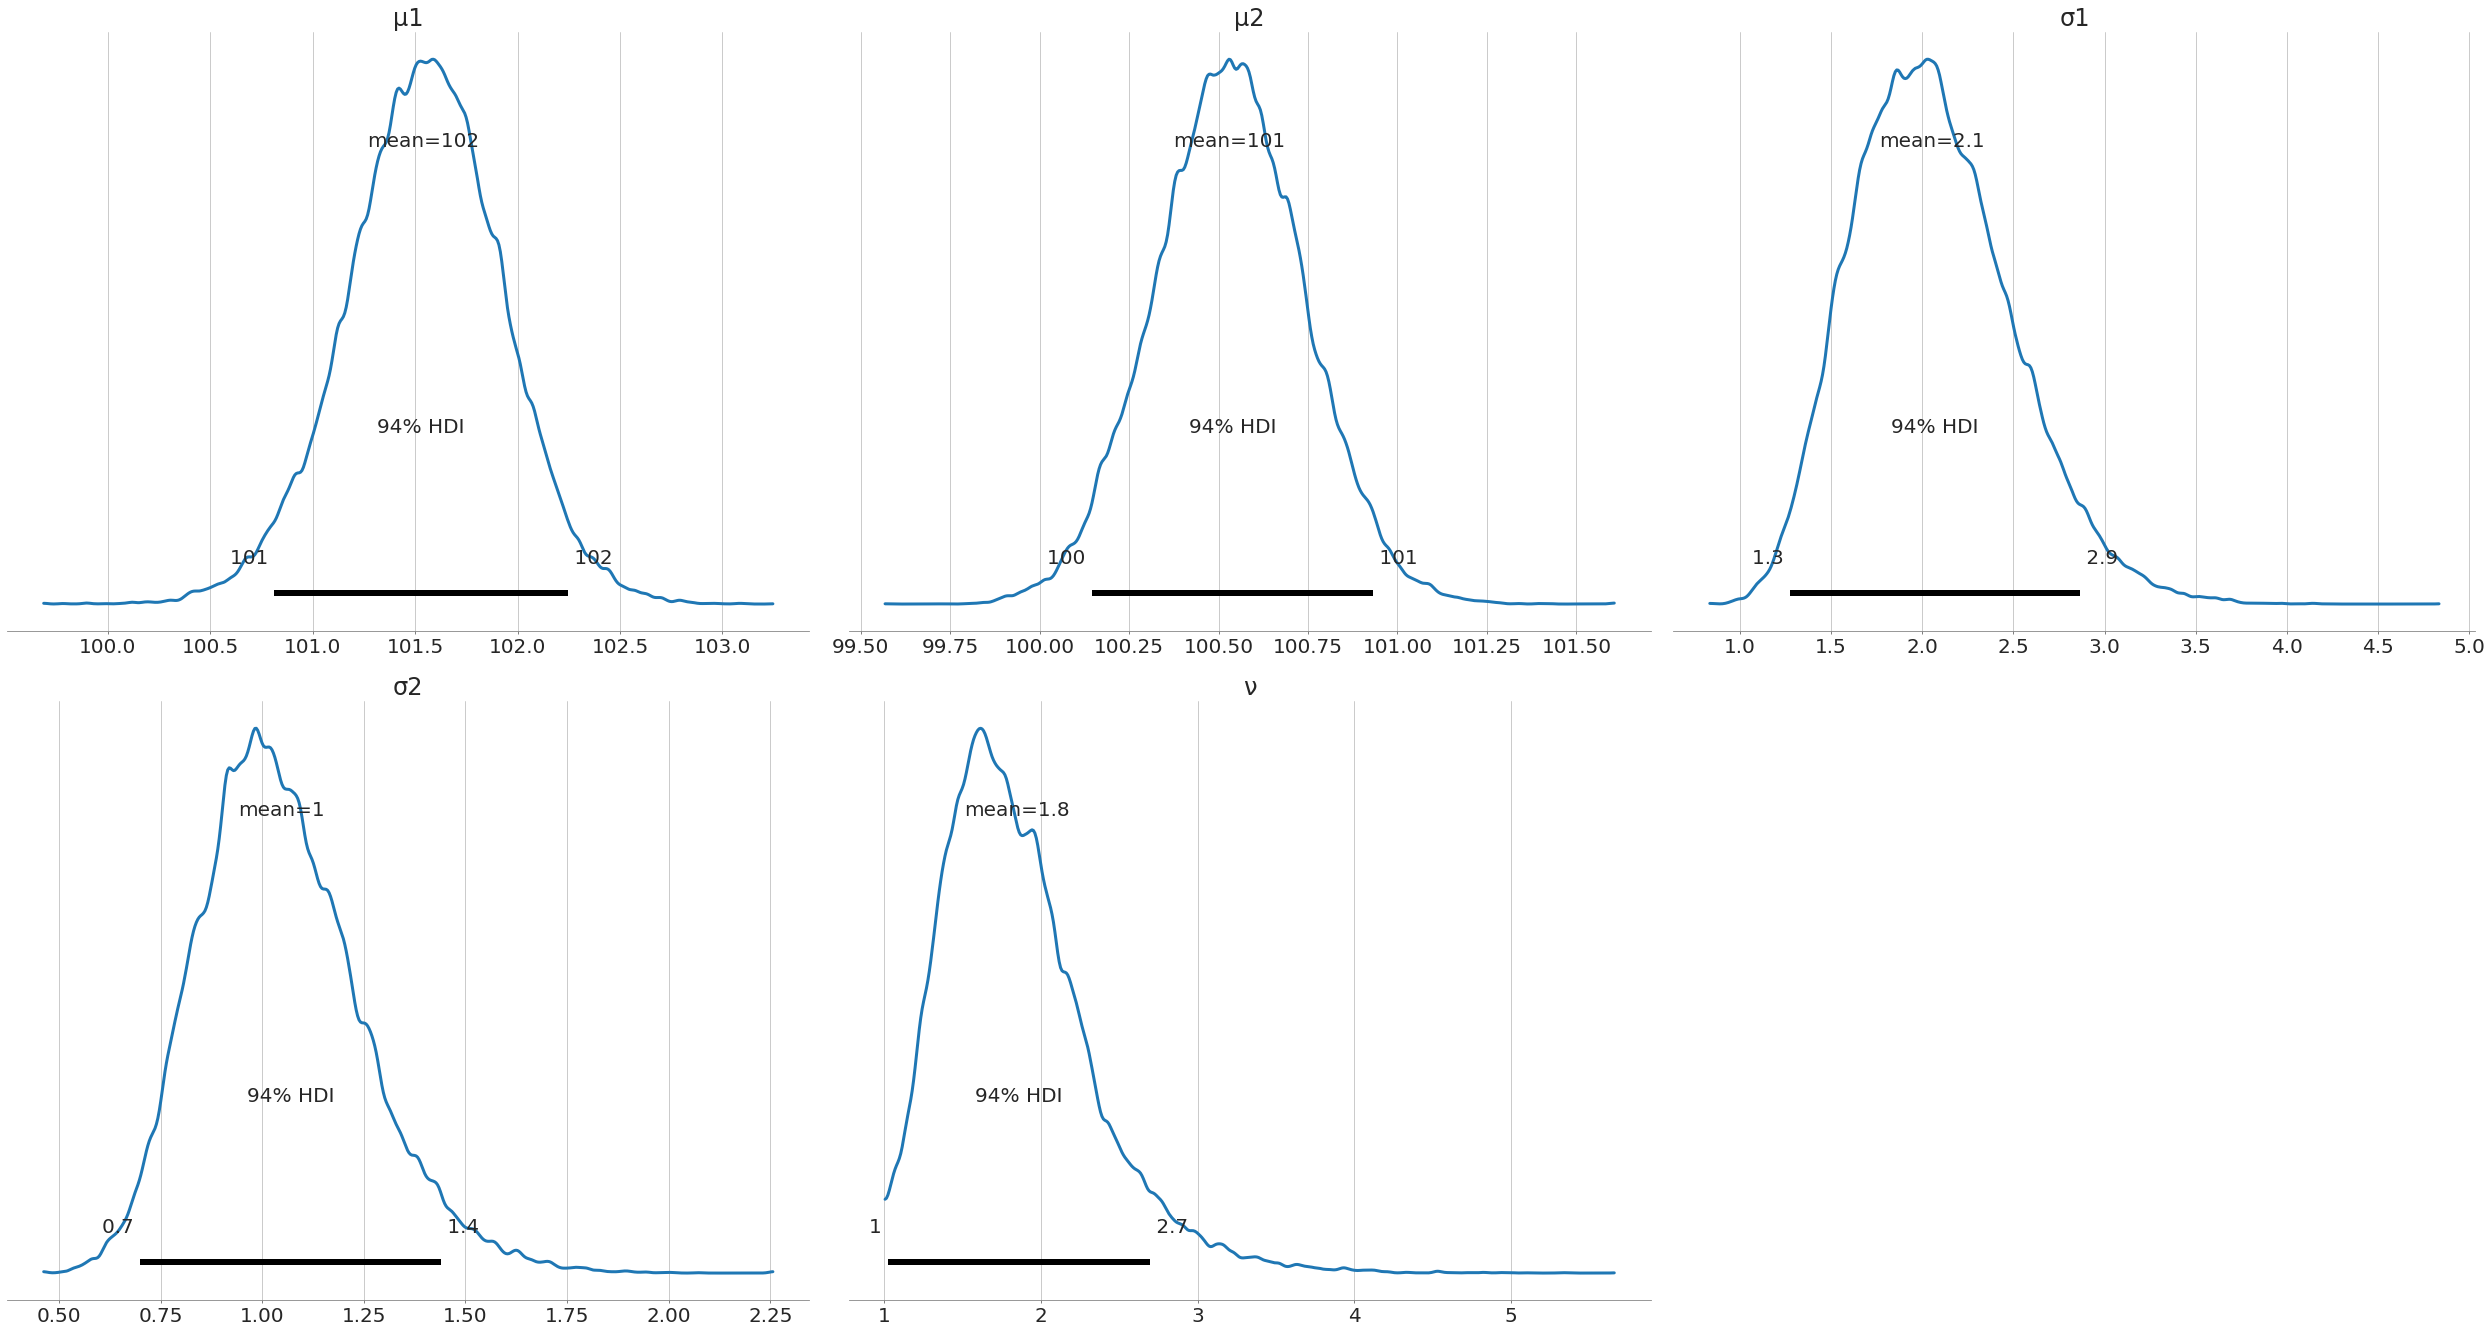

In [38]:
az.plot_posterior(inference);